In [6]:
!pip install umap-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
import umap.umap_ as umap


[notice] A new release of pip is available: 24.1.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
# 1) Загрузка данных
data_path = r'D:\Эстер\с рс\Courses\ML Engineer\HWEster22\archive\penguins.csv'
df = pd.read_csv(data_path)


In [9]:
# 2) EDA: Первичный анализ данных
print(df.info())
print(df.describe())

# Обработка пропусков и выбросов
df = df.dropna()

# Нормализация числовых признаков
numeric_cols = df.select_dtypes(include=np.number).columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB
None
       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         214.014620  4201.754386
std            5.459584         1.974793         260.558057   801.954536
min           32.100000        13.100000        -132.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  405

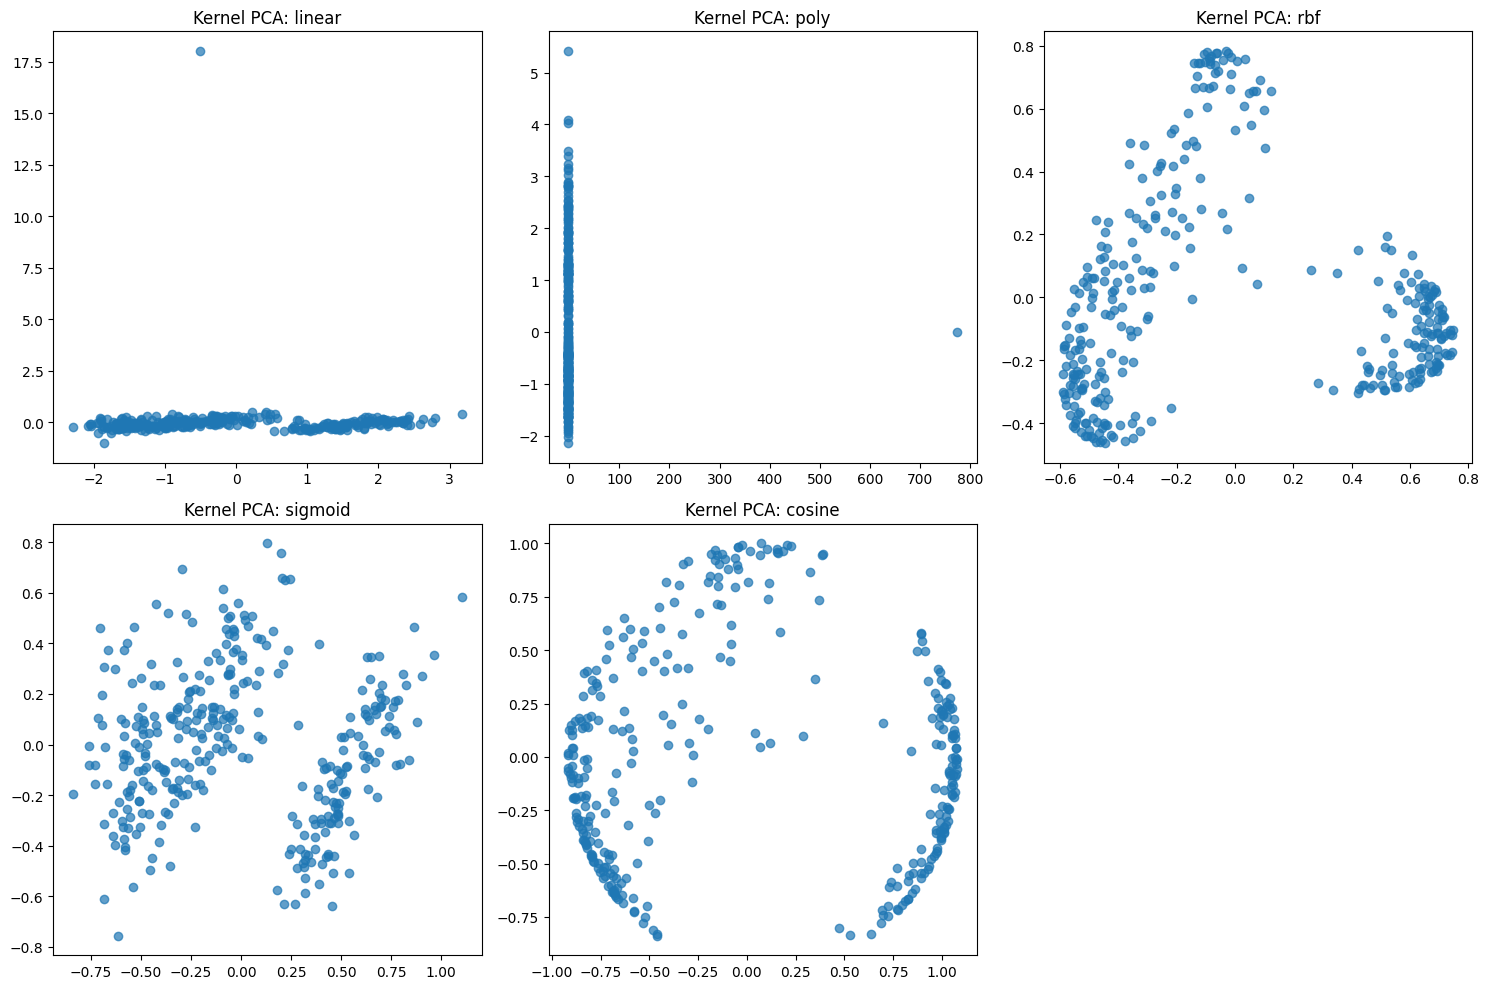

In [10]:
# 3) Kernel PCA с разными ядрами
kernels = ['linear', 'poly', 'rbf', 'sigmoid', 'cosine']

plt.figure(figsize=(15, 10))
for i, kernel in enumerate(kernels):
    kpca = KernelPCA(n_components=2, kernel=kernel)
    reduced_data = kpca.fit_transform(df[numeric_cols])
    plt.subplot(2, 3, i + 1)
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.7)
    plt.title(f'Kernel PCA: {kernel}')
plt.tight_layout()
plt.show()

In [11]:
# Оценка дисперсии для линейного ядра
kpca_linear = KernelPCA(n_components=2, kernel='linear', fit_inverse_transform=True)
linear_data = kpca_linear.fit_transform(df[numeric_cols])

explained_variance = np.var(linear_data, axis=0)
total_variance = np.var(df[numeric_cols], axis=0).sum()
lost_variance = 1 - explained_variance.sum() / total_variance

print(f'Explained variance: {explained_variance}')
print(f'Lost variance: {lost_variance}')

Explained variance: [1.87613369 1.01382953]
Lost variance: 0.27750919440497923


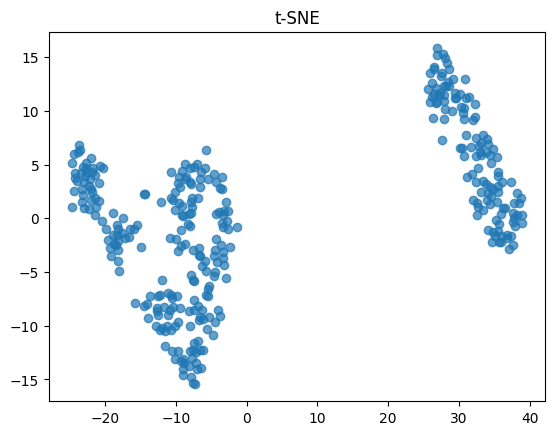

In [12]:
# 4) Применение t-SNE
reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(df[numeric_cols])
plt.scatter(reduced_tsne[:, 0], reduced_tsne[:, 1], alpha=0.7)
plt.title('t-SNE')
plt.show()


D:\Yolo8\CVAT2YOLO\WORK\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


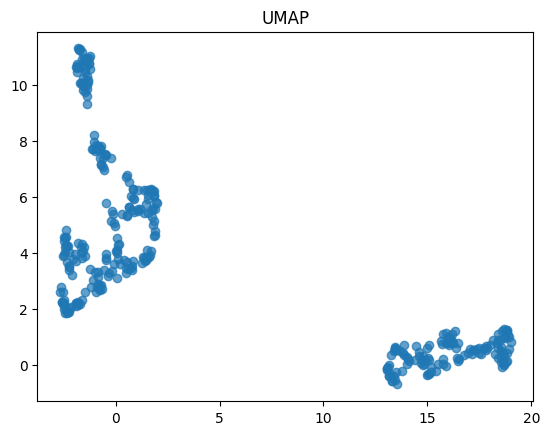

In [13]:
# 5) Применение UMAP
reduced_umap = umap.UMAP(n_components=2, random_state=42).fit_transform(df[numeric_cols])
plt.scatter(reduced_umap[:, 0], reduced_umap[:, 1], alpha=0.7)
plt.title('UMAP')
plt.show()
